In [13]:
# import necessary modules
from obspy import UTCDateTime
from obspy import Trace
from obspy import Stream
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from obspy.clients.fdsn import Client
from obspy.core.inventory.inventory import Inventory

client_wm = Client("IRIS")


In [24]:
st = client_wm.get_stations
# st = Stream()
# inv = Inventory()
name = 'K223'
chan = 'HN?'
net  = 'AK'
or_time = '2018-11-30T17:29:29.000Z'
or_time = UTCDateTime(or_time)


In [33]:
st  = client_wm.get_waveforms(net, name, "*", chan, or_time+5, or_time+40)
inv = client_wm.get_stations(network=net, station=name, location="*", channel=chan, starttime=or_time+5, endtime=or_time+40, level='response')
# show the contents of the obspy stream called st
# st
inv

Inventory created at 2023-02-17T21:49:34.356100Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2018-11-30...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			AK
		Stations (1):
			AK.K223 (Anchorage, Government Hill Elem. School, AK, USA)
		Channels (3):
			AK.K223..HNZ, AK.K223..HNN, AK.K223..HNE

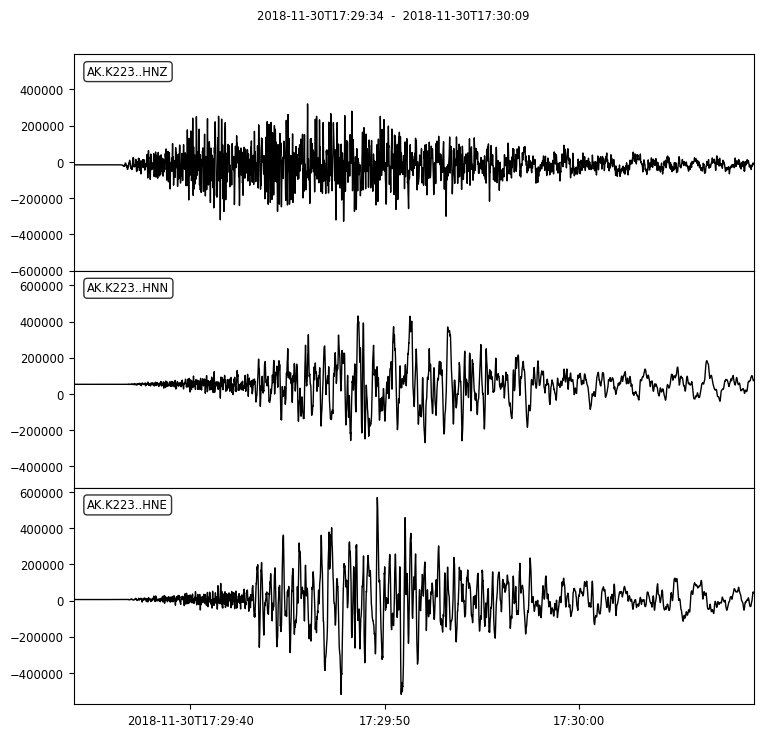

plot


In [34]:
st.plot()
print('plot')

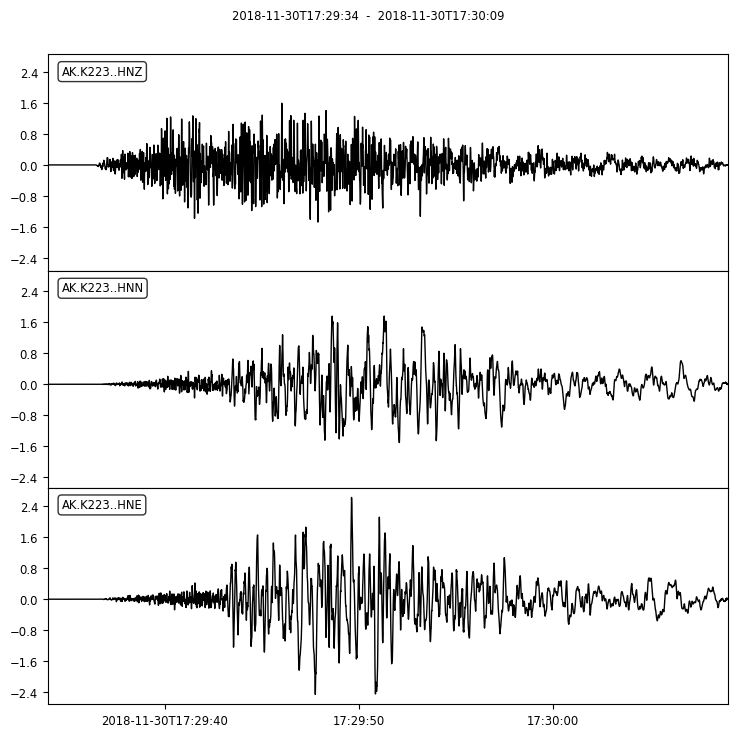

plot


In [35]:
resp_removed = st.copy()
resp_removed.attach_response(inv)
resp_removed = resp_removed.remove_response(output='ACC')
resp_removed.plot()
print('plot')